# Face Mesh

## Import Packages

In [4]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

In [5]:
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

## Function
Colab 또는 Jupyter Notebook에서 이미지를 확인하기 위한 Function입니다.

In [6]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

이미지에서 얼굴을 찾아내는 Function입니다.

In [16]:
def face_mesh(image, static_image_mode=True, max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5):
    drawing_spec = mp_drawing.DrawingSpec(thickness=10, circle_radius=1)
    
    with mp_face_mesh.FaceMesh(static_image_mode=static_image_mode, 
                           max_num_faces=max_num_faces, 
                           refine_landmarks=refine_landmarks, 
                           min_detection_confidence=min_detection_confidence) as face_mesh:
        results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if not results.multi_face_landmarks:
            print("Face not found in image")
        else:
            print('Found {} faces.'.format(len(results.multi_face_landmarks)))

            annotated_image = image.copy()
            for face_landmarks in results.multi_face_landmarks:
                # print('face_landmarks:', face_landmarks)
                mp_drawing.draw_landmarks(image=annotated_image, 
                                          landmark_list=face_landmarks, 
                                          connections=mp_face_mesh.FACEMESH_TESSELATION,
                                          landmark_drawing_spec=drawing_spec, 
                                          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
                mp_drawing.draw_landmarks(image=annotated_image,
                                          landmark_list=face_landmarks,
                                          connections=mp_face_mesh.FACEMESH_CONTOURS,
                                          landmark_drawing_spec=drawing_spec,
                                          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
                mp_drawing.draw_landmarks(image=annotated_image,
                                          landmark_list=face_landmarks,
                                          connections=mp_face_mesh.FACEMESH_IRISES,
                                          landmark_drawing_spec=None,
                                          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())

            plt_imshow(["Original", "Find Faces"], [image, annotated_image], figsize=(16,10))

In [17]:
static_image_mode = True
max_num_faces = 10
refine_landmarks = True
min_detection_confidence = 0.5

In [18]:
image_path = 'asset/images/kim.jpg'
image = cv2.imread(image_path)

Found 1 faces.


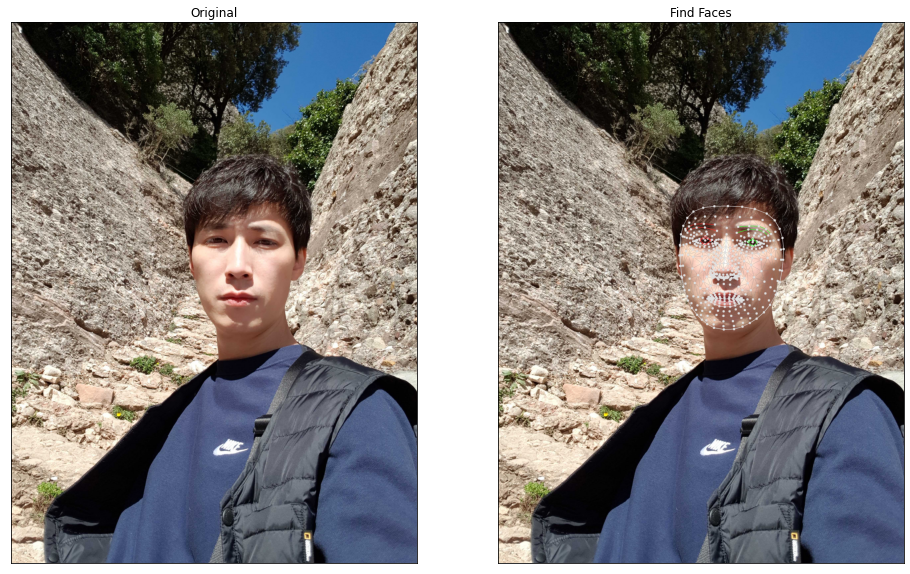

In [19]:
face_mesh(image)